## Importing Libraries

In [259]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
from sklearn.decomposition import PCA

%matplotlib inline

## Dataset handling

In [260]:
df = pd.read_csv("FODS-A2.csv")
df.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances
0,21.20,33.290,19.823333,31.790000,23.463333,38.230000,20.50,31.73,19.200000,39.363333,...,29.230000,9.85,756.183333,41.833333,4.833333,40.0,-2.67,42.017180,42.017180,290
1,21.79,38.500,19.500000,40.633333,22.500000,37.900000,21.00,37.90,20.033333,47.290000,...,40.326667,6.90,754.000000,75.000000,4.000000,40.0,2.80,24.624380,24.624380,50
2,22.39,41.390,20.200000,43.790000,24.500000,39.333333,20.10,38.26,19.390000,48.090000,...,42.060000,10.10,756.433333,68.000000,5.833333,40.0,4.45,3.731260,3.731260,260
3,24.00,30.260,24.390000,26.963333,23.390000,33.400000,22.79,31.20,21.033333,40.626667,...,35.500000,19.10,760.000000,31.000000,4.000000,40.0,1.50,1.058826,1.058826,50
4,20.05,38.245,17.600000,41.000000,21.100000,37.200000,19.89,36.40,18.200000,43.560000,...,38.863333,0.10,754.600000,99.000000,1.000000,32.0,-0.10,39.248108,39.248108,30


In [261]:
from itertools import chain, combinations

def powerset(iterable):
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

## Feature Selection using Pearson Coefficient

In [262]:
y  = df['Appliances'].to_numpy().T
df1 = df.drop('Appliances', axis = 1).to_numpy().T

In [263]:
df1.shape[0]

26

In [264]:
pearsonCoeff = []
for i in range(df1.shape[0]):
    pearsonCoeff.append(abs(np.corrcoef(df1[i], y)[0][1]))

In [265]:
pearsonCoeff = pd.DataFrame(pearsonCoeff, columns = ['Absolute Pearson Correlation Coeff'])
pearsonCoeff['Feature'] = df.drop('Appliances', axis = 1).columns

In [266]:
pearsonCoeff = pearsonCoeff.sort_values("Absolute Pearson Correlation Coeff", ascending=False)

In [267]:
pearsonCoeff

,Absolute Pearson Correlation Coeff,Feature
20,0.157888,RH_out
10,0.115799,T6
2,0.109542,T2
18,0.098908,T_out
15,0.091040,RH_8
21,0.090048,Windspeed
11,0.083081,RH_6
4,0.080892,T3
1,0.076796,RH_1
3,0.066223,RH_2


In [268]:
set1 = []
for i in range(df1.shape[0]):
    s = []
    for j in range(i+1):
        s.append(pearsonCoeff.iloc[j].Feature)
    set1.append(s)

In [269]:
print(len(set1))
set1

26


[['RH_out'],
 ['RH_out', 'T6'],
 ['RH_out', 'T6', 'T2'],
 ['RH_out', 'T6', 'T2', 'T_out'],
 ['RH_out', 'T6', 'T2', 'T_out', 'RH_8'],
 ['RH_out', 'T6', 'T2', 'T_out', 'RH_8', 'Windspeed'],
 ['RH_out', 'T6', 'T2', 'T_out', 'RH_8', 'Windspeed', 'RH_6'],
 ['RH_out', 'T6', 'T2', 'T_out', 'RH_8', 'Windspeed', 'RH_6', 'T3'],
 ['RH_out', 'T6', 'T2', 'T_out', 'RH_8', 'Windspeed', 'RH_6', 'T3', 'RH_1'],
 ['RH_out',
  'T6',
  'T2',
  'T_out',
  'RH_8',
  'Windspeed',
  'RH_6',
  'T3',
  'RH_1',
  'RH_2'],
 ['RH_out',
  'T6',
  'T2',
  'T_out',
  'RH_8',
  'Windspeed',
  'RH_6',
  'T3',
  'RH_1',
  'RH_2',
  'RH_7'],
 ['RH_out',
  'T6',
  'T2',
  'T_out',
  'RH_8',
  'Windspeed',
  'RH_6',
  'T3',
  'RH_1',
  'RH_2',
  'RH_7',
  'RH_9'],
 ['RH_out',
  'T6',
  'T2',
  'T_out',
  'RH_8',
  'Windspeed',
  'RH_6',
  'T3',
  'RH_1',
  'RH_2',
  'RH_7',
  'RH_9',
  'T1'],
 ['RH_out',
  'T6',
  'T2',
  'T_out',
  'RH_8',
  'Windspeed',
  'RH_6',
  'T3',
  'RH_1',
  'RH_2',
  'RH_7',
  'RH_9',
  'T1',
  '

## Feature Selection using PCA

In [270]:
def pcatransform(x, dim):
    y  = x['Appliances']
    x = x.drop('Appliances', axis = 1)
    pca = PCA(n_components = dim)
    x_pca = pca.fit_transform(x)
    x_pca = pd.DataFrame(x_pca, columns = pca.get_feature_names_out())
    x_pca['Appliances'] = y
    return x_pca

In [271]:
pcatransform(df, 4)

,pca0,pca1,pca2,pca3,Appliances
0,64.594289,25.623187,-21.523955,4.501399,290
1,14.875162,-0.071115,-4.032300,-0.811503,50
2,17.132823,-29.704006,-0.892107,-1.988266,260
3,72.902150,-32.291266,-18.087868,2.900424,50
4,-30.489580,19.746665,-4.526898,9.172517,30
...,...,...,...,...,...
7889,-6.725964,-15.723295,5.492951,1.550235,40
7890,60.243530,-13.565349,-5.209286,-2.669329,120
7891,55.839929,5.976974,-7.863621,-0.342534,120
7892,-39.138646,8.128155,5.331361,13.413118,50


## Shuffling and splitting data into training and testing subsets

In [272]:
def split(df):
    # Shuffling the dataset
    shuffled_df = df.sample(frac=1, random_state=100)

    # Define a size for your train set
    training_data_size = int(0.8 * len(df))

    # Split your dataset
    training_data = shuffled_df[:training_data_size]
    testing_data = shuffled_df[training_data_size:]
    
    X_train = training_data.drop(['Appliances'], axis=1)
    X_test = testing_data.drop(['Appliances'], axis=1)
    y_train = training_data["Appliances"].to_numpy().T
    y_test = testing_data["Appliances"].to_numpy().T
    
    return X_train, X_test, y_train, y_test

## Functions for regression

In [274]:
def batchnorm(X_train, X_test):
    mean = X_train.mean()
    stddev = X_train.std()
    X_train = (X_train - mean) / stddev
    X_test = (X_test - mean) / stddev
    X_train.to_numpy()
    X_test.to_numpy()
    return X_train, X_test

In [275]:
def initialize(dim):
    np.random.seed(42)
    b = random.random()
    theta = np.random.rand(1, dim) * 0.01
    return b, theta

In [285]:
def gradient_descent(num_epochs, X, t, theta, bias, lr):
    # forward-prop
    costs = []
    for iter in range(num_epochs):
        y = np.dot(theta, X.T) + bias

        loss = get_cost(y, t)
        # print(loss)
        costs.append(loss)

        # backprop
        der = (1 / y.shape[1]) * np.dot(y - t, X)

        dBias = (1 / y.shape[1]) * np.sum((y - t))

        # updation
        # theta = theta - (learning_rate/y.shape[1]) * np.sum(X * ((predicted(X,theta)) - y), axis=0)
        theta = theta - lr * der
        bias = bias - lr * dBias

    return costs,theta,bias

In [273]:
def get_cost(y, t):
    return 0.5 * np.sum(np.power((t - y), 2)) / y.shape[1]

In [289]:
def fwd_prop_test(X, y_test, theta, bias):
    y = np.dot(theta, X.T) + bias
    loss = get_cost(y, y_test)
    return loss

In [290]:
def batch_gd(dim, num_epochs, learning_rate):
    x_pca = pcatransform(df, dim)
    X_train, X_test, y_train, y_test = split(x_pca)
    X_train, X_test = batchnorm(X_train, X_test)
    bias, weights = initialize(dim)
    BGD_MSE_train,weights,bias = gradient_descent(
        num_epochs, X_train, y_train, weights, bias, learning_rate
    )
    plt.plot(BGD_MSE_train)
    plt.xlabel("Epochs")
    plt.ylabel("MSE")
    plt.title("LOSS CURVE")
    plt.show()
    #plt.savefig('Training error for BGD degree {}.png'.format(degree))
    BGD_mse_test = fwd_prop_test(X_test, y_test, weights, bias)
    return BGD_mse_test, BGD_MSE_train, bias, weights

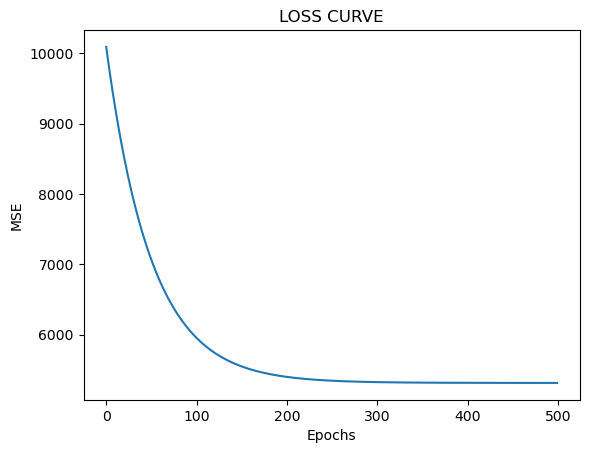

In [305]:
test_mse, costs, biasarr, weightarr = batch_gd(3, 500, 0.01)

In [306]:
test_mse

5702.877591677527